In [16]:
class AStar(object):
    def __init__(self, graph):
        self.graph = graph
        
    def heuristic(self, node, start, end):
        raise NotImplementedError
        
    def search(self, start, end):
        openset = set()
        closedset = set()
        current = start
        openset.add(current)
        while openset:
            current = min(openset, key=lambda o:o.g + o.h)
            if current == end:
                path = []
                while current.parent:
                    path.append(current)
                    current = current.parent
                path.append(current)
                return path[::-1]
            openset.remove(current)
            closedset.add(current)
            for node in self.graph[current]:
                if node in closedset:
                    continue
                if node in openset:
                    new_g = current.g + current.move_cost(node)
                    if node.g > new_g:
                        node.g = new_g
                        node.parent = current
                else:
                    node.g = current.g + current.move_cost(node)
                    node.h = self.heuristic(node, start, end)
                    node.parent = current
                    openset.add(node)
        return None

class AStarNode(object):
    def __init__(self):
        self.g = 0
        self.h = 0
        self.parent = None
        
    def move_cost(self, other):
        raise NotImplementedError

In [126]:
from math import sqrt

class AStarGrid(AStar):
    def heuristic(self, node, start, end):
        # NOTE: this is traditionally sqrt((end.x - node.x)**2 + (end.y - node.y)**2)
        # However, if you are not interested in the *actual* cost, but only relative cost,
        # then the math can be simplified.
        return abs(end.x - node.x) + abs(end.y - node.y)
        #return sqrt((end.x - node.x)**2 + (end.y - node.y)**2)

class AStarGridNode(AStarNode):
    def __init__(self, x, y):
        self.x, self.y = x, y
        super(AStarGridNode, self).__init__()

    def move_cost(self, other):
        diagonal = abs(self.x - other.x) == 1 and abs(self.y - other.y) == 1
        return 25 if diagonal else 10

    def __repr__(self):
        return '(%d %d)' % (self.x, self.y)

In [127]:
from itertools import product

def make_graph(mapinfo):
    nodes = [[AStarGridNode(x, y) for y in range(mapinfo['height'])] for x in range(mapinfo['width'])]
    graph = {}
    for x, y in product(range(mapinfo['width']), range(mapinfo['height'])):
        node = nodes[x][y]
        graph[node] = []
        for i, j in product([-1, 0, 1], [-1, 0, 1]):
            if not (0 <= x + i < mapinfo['width']): continue
            if not (0 <= y + j < mapinfo['height']): continue
            if [x+i,y+j] in mapinfo['obstacle']: continue
            graph[nodes[x][y]].append(nodes[x+i][y+j])
    return graph, nodes

obstacle = [[2,5],[3,5],[4,5],[5,5]]
graph, nodes = make_graph({"width": 8, "height": 8, "obstacle":[]})
paths = AStarGrid(graph)
start, end = nodes[1][1], nodes[5][7]
path = paths.search(start, end)
if path is None:
    print "No path found"
else:
    print "Path found:", path

Path found: [(1 1), (1 2), (1 3), (2 3), (3 3), (3 4), (3 5), (3 6), (4 6), (5 6), (5 7)]


In [31]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


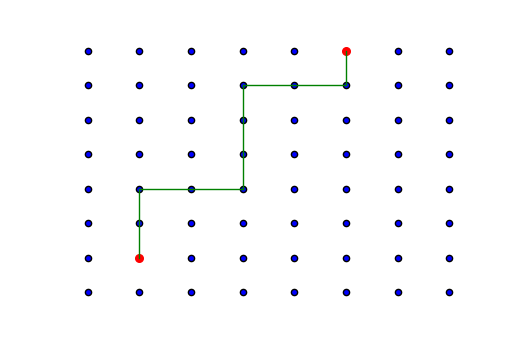

In [141]:
from itertools import product
for indices in product(range(len(nodes)), repeat=2):
    plt.scatter(indices[0],indices[1])
plt.axis('off')

for i in range(1,len(path)):
    plt.plot([path[i-1].x,path[i].x],[path[i-1].y,path[i].y],c='green')
plt.scatter(start.x,start.y,c='r',edgecolor='r',lw=2)
plt.scatter(end.x,end.y,c='r',edgecolor='r',lw=2)

In [135]:
len(nodes)

8

In [129]:
start

(1 1)

In [143]:
graph

{(3 7): [(2 6), (2 7), (3 6), (3 7), (4 6), (4 7)],
 (3 6): [(2 5), (2 6), (2 7), (3 5), (3 6), (3 7), (4 5), (4 6), (4 7)],
 (2 2): [(1 1), (1 2), (1 3), (2 1), (2 2), (2 3), (3 1), (3 2), (3 3)],
 (0 0): [(0 0), (0 1), (1 0), (1 1)],
 (0 2): [(0 1), (0 2), (0 3), (1 1), (1 2), (1 3)],
 (0 3): [(0 2), (0 3), (0 4), (1 2), (1 3), (1 4)],
 (2 6): [(1 5), (1 6), (1 7), (2 5), (2 6), (2 7), (3 5), (3 6), (3 7)],
 (3 1): [(2 0), (2 1), (2 2), (3 0), (3 1), (3 2), (4 0), (4 1), (4 2)],
 (3 3): [(2 2), (2 3), (2 4), (3 2), (3 3), (3 4), (4 2), (4 3), (4 4)],
 (3 4): [(2 3), (2 4), (2 5), (3 3), (3 4), (3 5), (4 3), (4 4), (4 5)],
 (2 3): [(1 2), (1 3), (1 4), (2 2), (2 3), (2 4), (3 2), (3 3), (3 4)],
 (1 0): [(0 0), (0 1), (1 0), (1 1), (2 0), (2 1)],
 (1 3): [(0 2), (0 3), (0 4), (1 2), (1 3), (1 4), (2 2), (2 3), (2 4)],
 (1 6): [(0 5), (0 6), (0 7), (1 5), (1 6), (1 7), (2 5), (2 6), (2 7)],
 (0 4): [(0 3), (0 4), (0 5), (1 3), (1 4), (1 5)],
 (2 5): [(1 4), (1 5), (1 6), (2 4), (2 5), (